In [2]:
import kaggle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\007ai\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\007ai\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
kaggle.api.authenticate()

In [4]:
kaggle.api.dataset_download_files("hetmengar/ola-and-uber-ride-booking-and-cancellation-data",path=".",unzip=True)

Dataset URL: https://www.kaggle.com/datasets/hetmengar/ola-and-uber-ride-booking-and-cancellation-data


In [5]:
df= pd.read_csv("Bookings.csv",encoding="utf-8")

In [6]:
columns = df.columns.tolist()
print(columns)

['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID', 'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT', 'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver', 'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value', 'Payment_Method', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating', 'Vehicle Images', 'Unnamed: 20']


In [7]:
df.drop(columns=["Vehicle Images", "Unnamed: 20"], inplace=True)

In [8]:
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8
3,2024-07-22 3:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN
4,2024-07-02 9:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0


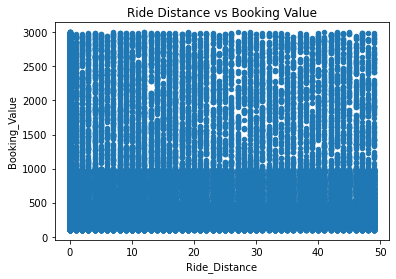

In [9]:
df.plot.scatter(
    x="Ride_Distance",
    y="Booking_Value",
    title="Ride Distance vs Booking Value"
)
plt.show()

In [10]:
df["Canceled_Rides_by_Driver"].value_counts()

Canceled_Rides_by_Driver
Personal & Car related issue           6542
Customer related issue                 5413
Customer was coughing/sick             3654
More than permitted people in there    2825
Name: count, dtype: int64

In [11]:
df["Canceled_Rides_by_Customer"].value_counts()

Canceled_Rides_by_Customer
Driver is not moving towards pickup location    3175
Driver asked to cancel                          2670
Change of plans                                 2081
AC is Not working                               1568
Wrong Address                                   1005
Name: count, dtype: int64

In [12]:
df_completed_rides= df[df["Incomplete_Rides"] == "No"]

In [13]:
df_completed_rides

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8
4,2024-07-02 9:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0
5,2024-07-13 4:42:00,04:42:00,CNR8787177882,Success,CID802429,Mini,Kadugodi,Vijayanagar,231.0,90.0,NaN,NaN,No,NaN,173,UPI,41,3.4,4.6
6,2024-07-23 9:51:00,09:51:00,CNR3612067560,Success,CID476071,Bike,Tumkur Road,Whitefield,133.0,40.0,NaN,NaN,No,NaN,140,Cash,49,3.2,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103019,2024-07-31 9:06:00,09:06:00,CNR9488489435,Success,CID371654,Prime Plus,Richmond Town,Varthur,245.0,35.0,NaN,NaN,No,NaN,111,Cash,41,3.6,3.8
103020,2024-07-31 15:12:00,15:12:00,CNR3151743100,Success,CID334158,Auto,Vijayanagar,Richmond Town,84.0,145.0,NaN,NaN,No,NaN,1097,UPI,17,4.3,3.3
103021,2024-07-31 13:59:00,13:59:00,CNR1286151233,Success,CID113188,Prime SUV,Bannerghatta Road,JP Nagar,35.0,75.0,NaN,NaN,No,NaN,2201,Cash,37,3.6,3.2
103022,2024-07-31 14:56:00,14:56:00,CNR2027162035,Success,CID118301,eBike,Indiranagar,Magadi Road,210.0,140.0,NaN,NaN,No,NaN,267,UPI,47,3.4,3.1


In [14]:
df_completed_rides["Payment_Method"].value_counts()

Payment_Method
Cash           32831
UPI            24339
Credit Card     2280
Debit Card       591
Name: count, dtype: int64

In [15]:
df_completed_rides["Vehicle_Type"].value_counts()

Vehicle_Type
Prime Sedan    8768
eBike          8606
Auto           8605
Bike           8555
Prime Plus     8539
Mini           8519
Prime SUV      8449
Name: count, dtype: int64

In [16]:
df_completed_rides=df_completed_rides.loc[:,["Time","Vehicle_Type","Pickup_Location","Drop_Location","Ride_Distance","Booking_Value"]]

In [17]:
df_completed_rides.sort_values(by="Booking_Value", ascending=False)

,Time,Vehicle_Type,Pickup_Location,Drop_Location,Ride_Distance,Booking_Value
83534,14:23:00,Prime SUV,Yeshwanthpur,Majestic,45,2999
17665,11:17:00,Mini,Cox Town,Bellandur,12,2999
64765,13:54:00,Prime Sedan,Kengeri,Chickpet,29,2999
94089,05:28:00,eBike,Hebbal,Varthur,7,2998
80888,20:55:00,eBike,Majestic,Chickpet,41,2998
...,...,...,...,...,...,...
53081,22:51:00,Auto,Peenya,Cox Town,10,100
93066,13:51:00,Bike,Cox Town,Malleshwaram,16,100
84453,03:54:00,Auto,Mysore Road,Shantinagar,12,100
6961,11:35:00,Auto,Jayanagar,Varthur,18,100


In [19]:
df_completed_rides2=df_completed_rides.loc[:,["Time","Ride_Distance","Booking_Value"]]

In [21]:
df_completed_rides2['Time'] = (
    pd.to_timedelta(df_completed_rides2['Time'])
      .dt.total_seconds()
      .astype(int)
)

In [23]:
df_completed_rides2.corr()

,Time,Ride_Distance,Booking_Value
Time,1.000000,-0.002394,-0.004673
Ride_Distance,-0.002394,1.000000,0.002824
Booking_Value,-0.004673,0.002824,1.000000
